In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mlp

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.3.0'

In [4]:
keras.__version__

'2.4.0'

## Load Data Set

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

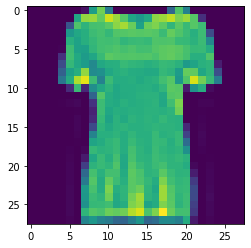

In [6]:
plt.imshow(X_train[10])

In [7]:
Y_train[10]

0

## Label	Description
0---T-shirt/top
1---Trouser
2---Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [8]:
class_names = ['T-shirt/top' ,'Trouser' ,'Pullover' , 'Dress' ,'Coat' , 'Sandal' ,'Shirt' , 'Sneaker' ,'Bag' , 'Ankle boot']

In [9]:
class_names[Y_train[10]]

'T-shirt/top'

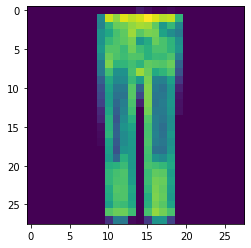

In [10]:
plt.imshow(X_test[15])

In [11]:
class_names[Y_test[15]]

'Trouser'

In [12]:
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

## Data Nomarlise
    1. data is varying from 0 to 255.
    so making it in same scale

In [13]:
X_train_scale = X_train/255.
X_test_scale = X_test/255.

In [14]:
X_valid,X_train_real  = X_train_scale[:5000],X_train_scale[5000:]
Y_valid, Y_train_real = Y_train[:5000],Y_train[5000:]

In [15]:
X_test_real = X_test_scale

In [16]:
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


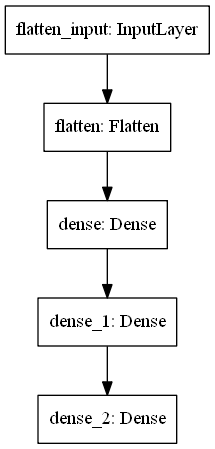

In [19]:
 import pydot
 keras.utils.plot_model(model)

In [20]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases.shape

(300,)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## https://keras.io/api/models/sequential/
# Modeling and training

In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [29]:
model_history = model.fit( X_train_real , Y_train_real ,  epochs=10 ,
                          validation_data = (X_valid,Y_valid) )

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4844 - accuracy: 0.8316 - val_loss: 0.4349 - val_accuracy: 0.8526
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4393 - accuracy: 0.8455 - val_loss: 0.5306 - val_accuracy: 0.7992
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4125 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8654
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3940 - accuracy: 0.8620 - val_loss: 0.3752 - val_accuracy: 0.8690
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.8675 - val_loss: 0.3708 - val_accuracy: 0.8728
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3633 - accuracy: 0.8715 - val_loss: 0.3629 - val_accuracy:

In [30]:
model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [31]:
model_history.history

{'loss': [0.7236779928207397,
  0.48435667157173157,
  0.4392773509025574,
  0.4125038683414459,
  0.39399659633636475,
  0.3753809332847595,
  0.36330899596214294,
  0.3518659174442291,
  0.34169813990592957,
  0.332302987575531],
 'accuracy': [0.7644181847572327,
  0.83160001039505,
  0.8455091118812561,
  0.8563636541366577,
  0.8620181679725647,
  0.8675090670585632,
  0.8715272545814514,
  0.8748727440834045,
  0.8787999749183655,
  0.8824545741081238],
 'val_loss': [0.5206745862960815,
  0.43492037057876587,
  0.530610978603363,
  0.3915655016899109,
  0.37518566846847534,
  0.37084585428237915,
  0.3629028797149658,
  0.3859662711620331,
  0.35902372002601624,
  0.34253165125846863],
 'val_accuracy': [0.8234000205993652,
  0.8525999784469604,
  0.7991999983787537,
  0.8654000163078308,
  0.8690000176429749,
  0.8727999925613403,
  0.871999979019165,
  0.86080002784729,
  0.870199978351593,
  0.8769999742507935]}

In [32]:
model_history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

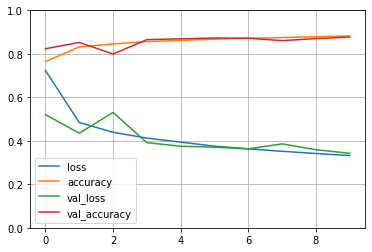

In [34]:
pd.DataFrame(model_history.history).plot(figsize = (6,4))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [35]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 61.1547 - accuracy: 0.8366


[61.15472412109375, 0.8366000056266785]

In [36]:
X_preview = X_test[:5]

In [38]:
Y_proba = model.predict(X_preview)
Y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [40]:
Y_predict = model.predict_classes(X_preview)
Y_predict

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, 1, 6], dtype=int64)

In [45]:
np.array(class_names)[Y_predict]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

AxesImage(54,36;334.8x217.44)


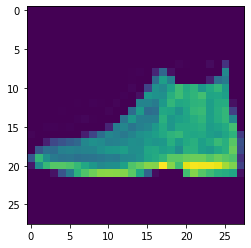

In [46]:
print(plt.imshow(X_test[0]))

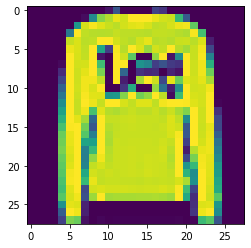

In [47]:
plt.imshow(X_test[1])

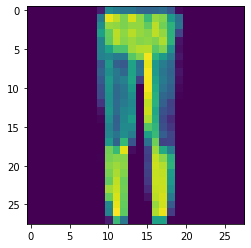

In [49]:
plt.imshow(X_test[3])